Link to colab

https://colab.research.google.com/drive/1Vv5WRi9DJ5rjFHVAzM4ptmobdsXtAOdO

In [2]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment3/'
FOLDERNAME = "cs231n-project"
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


In [3]:

import os
import torch
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from PIL import Image, ImageOps

In [4]:
from image_dataset import *


# dataset_path = f"./dataset/Taskent"
dataset_path = f"/content/drive/My Drive/cs231n-project/dataset/Taskent"
taskent = PetroDataset(dataset_path)

__init__ PetroDataset with: /content/drive/My Drive/cs231n-project/dataset/Taskent


# 01 - Visualzie Dataset

In [5]:
for entry in taskent:

    img, mask_human, mask_machine, img_filename, mash_human_filename, mask_machine_filename = entry

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

    ax1.imshow(img)
    ax1.set_title(img_filename)
    ax1.axis('off')

    ax2.imshow(mask_human)
    ax2.set_title(mash_human_filename)
    ax2.axis('off')

    mask_machine_display = mask_machine.convert('L')
    mask_machine_display = ImageOps.autocontrast(mask_machine_display)
    ax3.imshow(mask_machine_display)
    ax3.set_title(mask_machine_filename)
    ax3.axis('off')

    plt.tight_layout()


Output hidden; open in https://colab.research.google.com to view.

Unique values and their counts: [(np.uint8(0), np.int64(7)), (np.uint8(1), np.int64(7400192)), (np.uint8(2), np.int64(4255118)), (np.uint8(3), np.int64(25575)), (np.uint8(4), np.int64(25564)), (np.uint8(6), np.int64(17572)), (np.uint8(7), np.int64(7162)), (np.uint8(8), np.int64(50407)), (np.uint8(13), np.int64(14883))]
Unique values and their counts: [(np.uint8(1), np.int64(7520892)), (np.uint8(7), np.int64(71135)), (np.uint8(8), np.int64(50132)), (np.uint8(10), np.int64(3956310)), (np.uint8(12), np.int64(198011))]
Unique values and their counts: [(np.uint8(0), np.int64(7)), (np.uint8(1), np.int64(9811862)), (np.uint8(2), np.int64(464572)), (np.uint8(4), np.int64(57431)), (np.uint8(6), np.int64(24528)), (np.uint8(8), np.int64(48889)), (np.uint8(10), np.int64(290862)), (np.uint8(12), np.int64(1098329))]
Unique values and their counts: [(np.uint8(1), np.int64(11493341)), (np.uint8(2), np.int64(277620)), (np.uint8(8), np.int64(25519))]
Unique values and their counts: [(np.uint8(1), np.int

<ipython-input-5-ade6cfb1939c>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


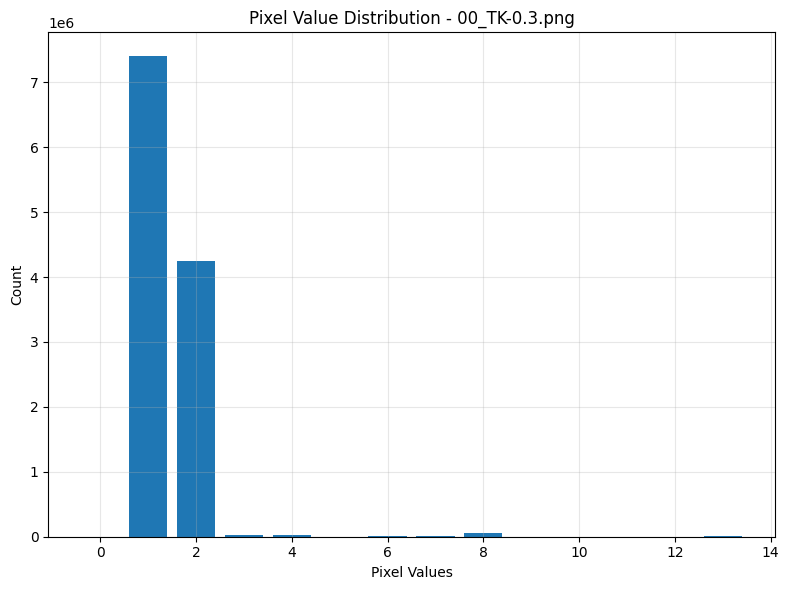

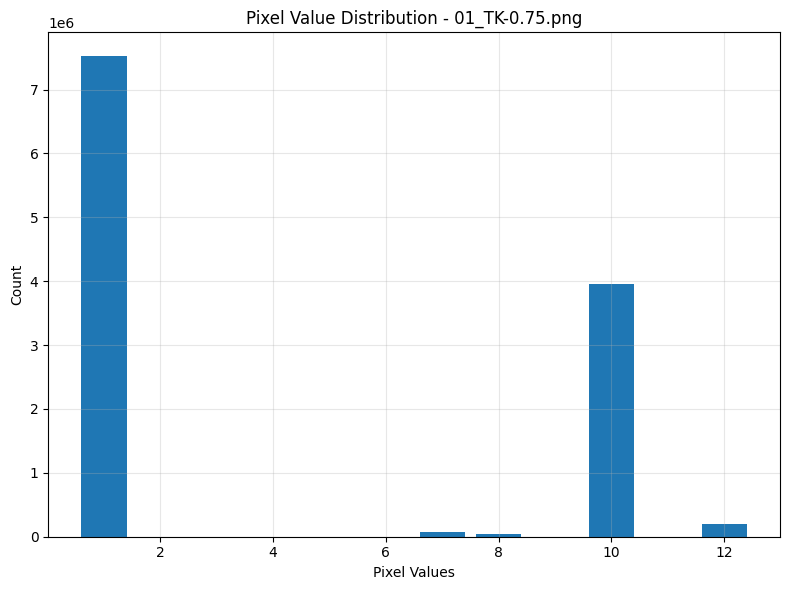

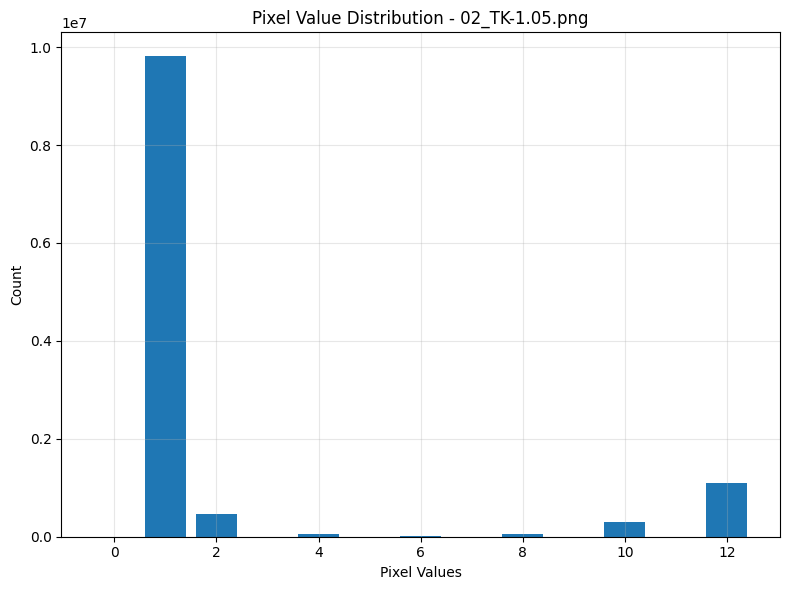

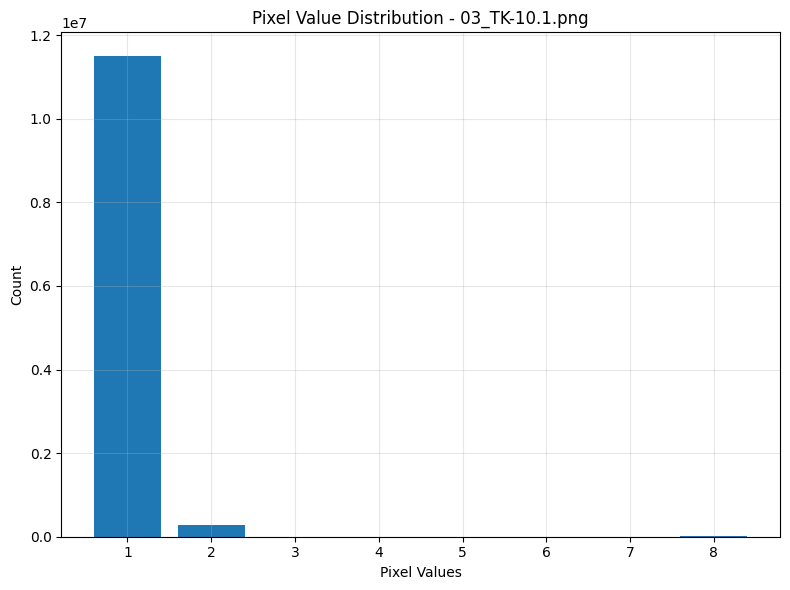

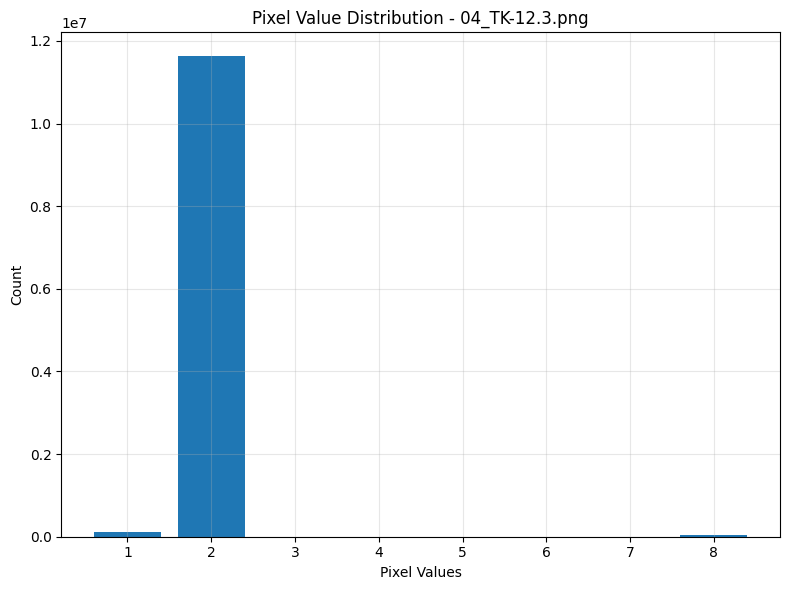

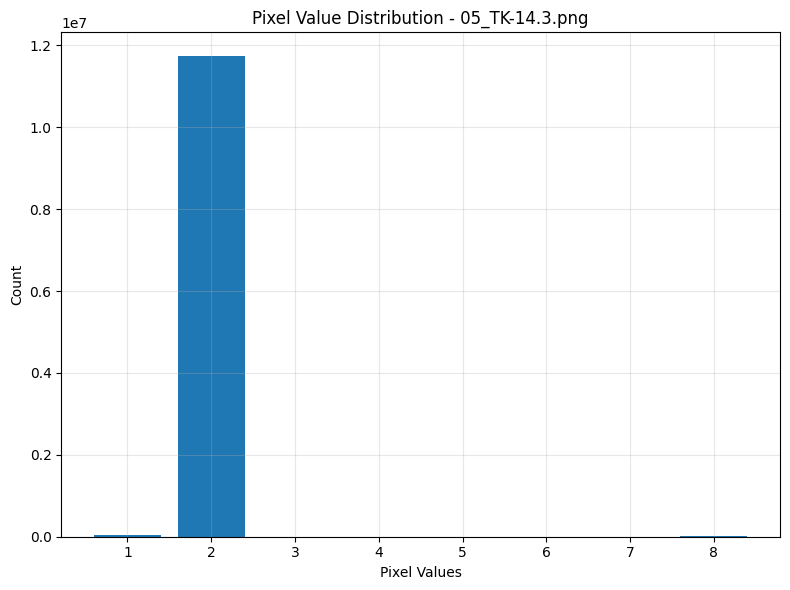

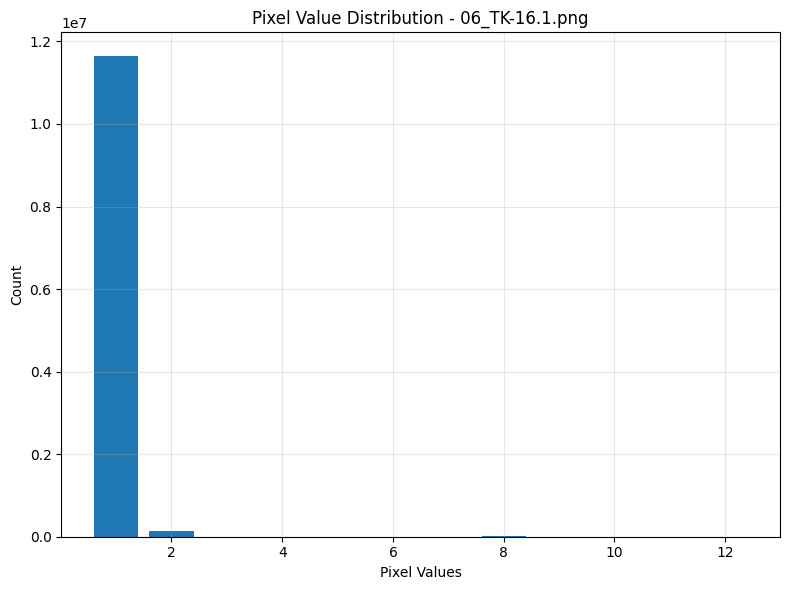

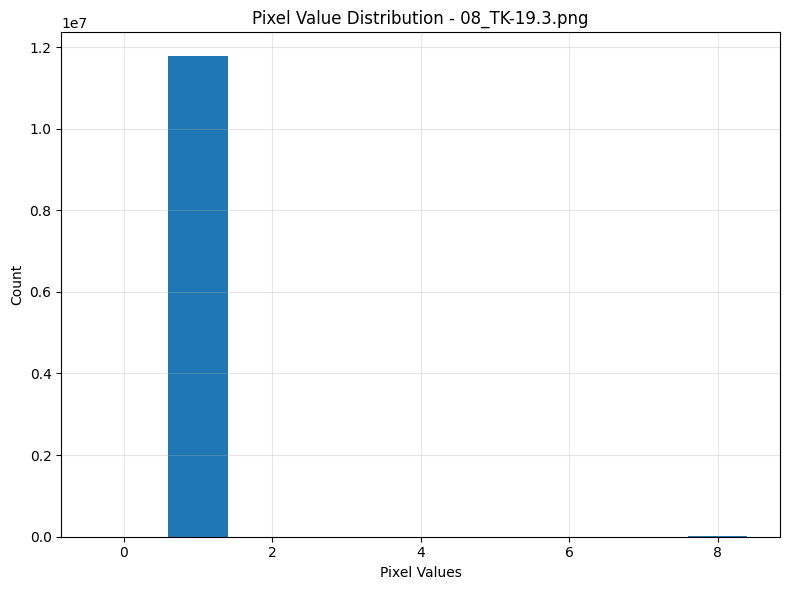

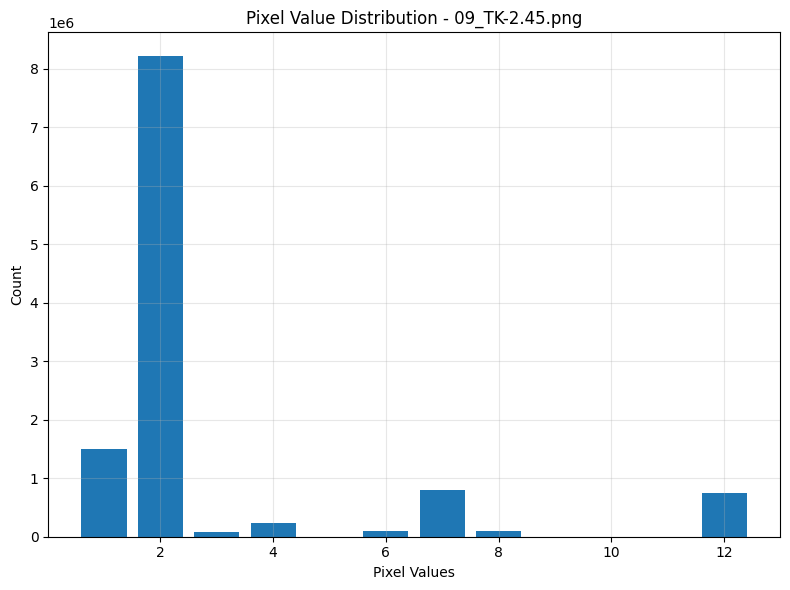

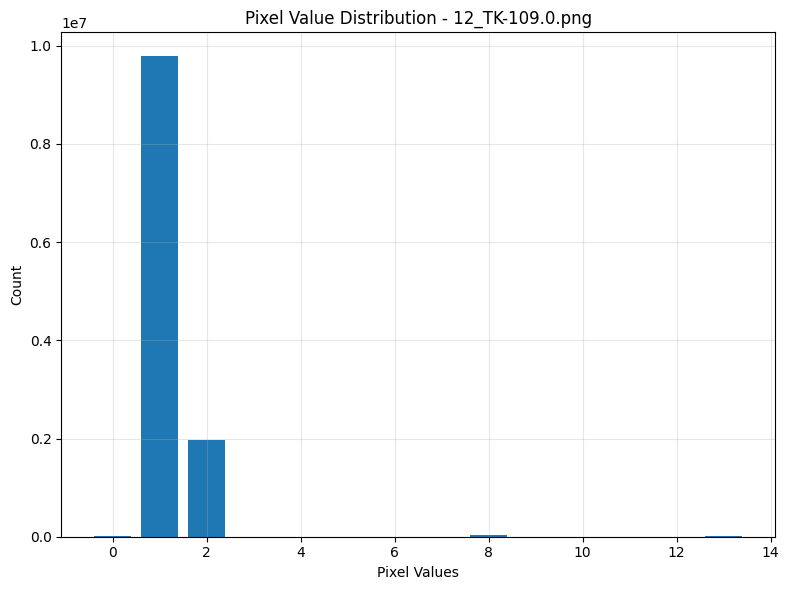

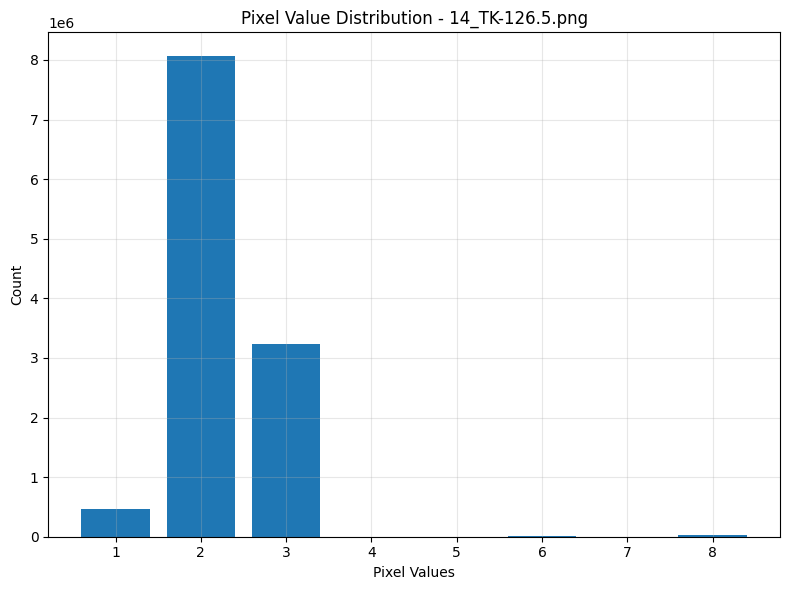

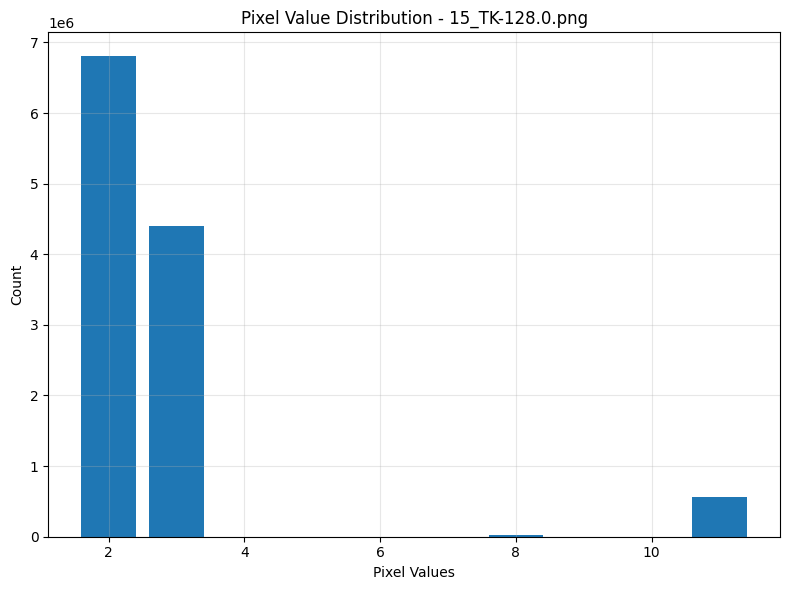

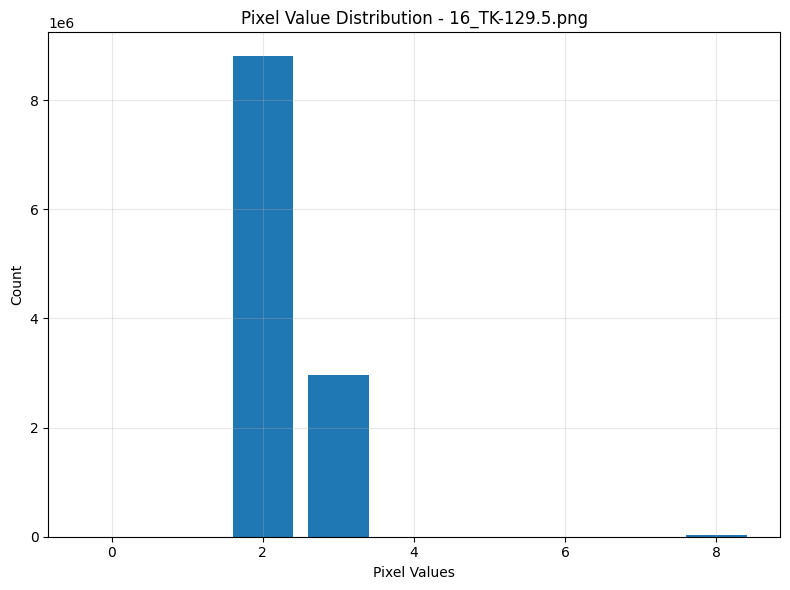

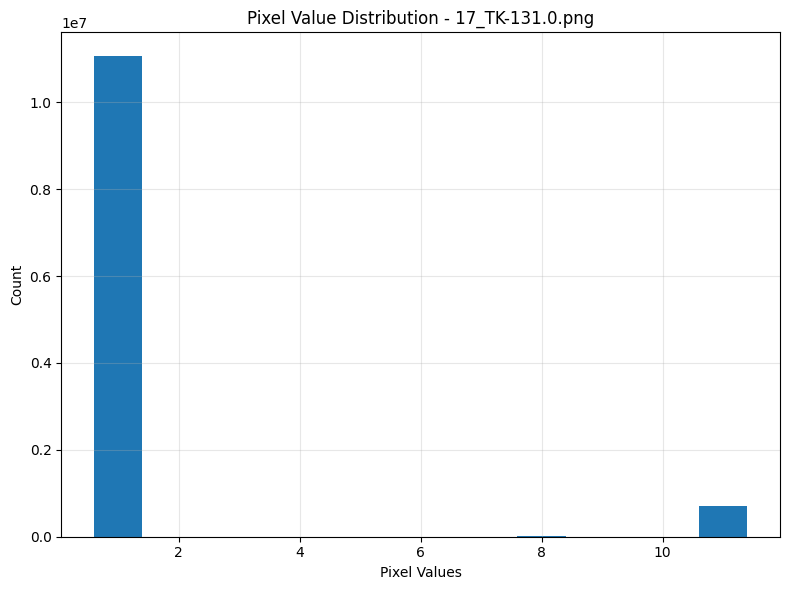

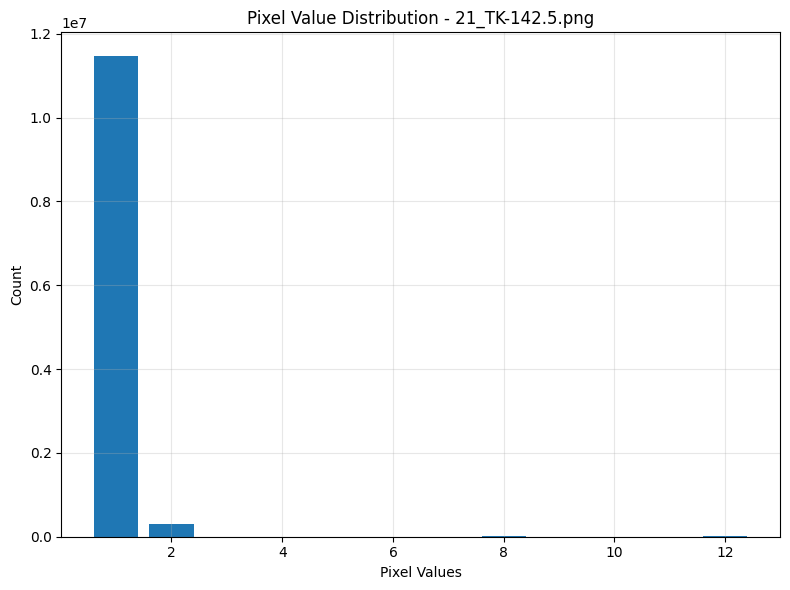

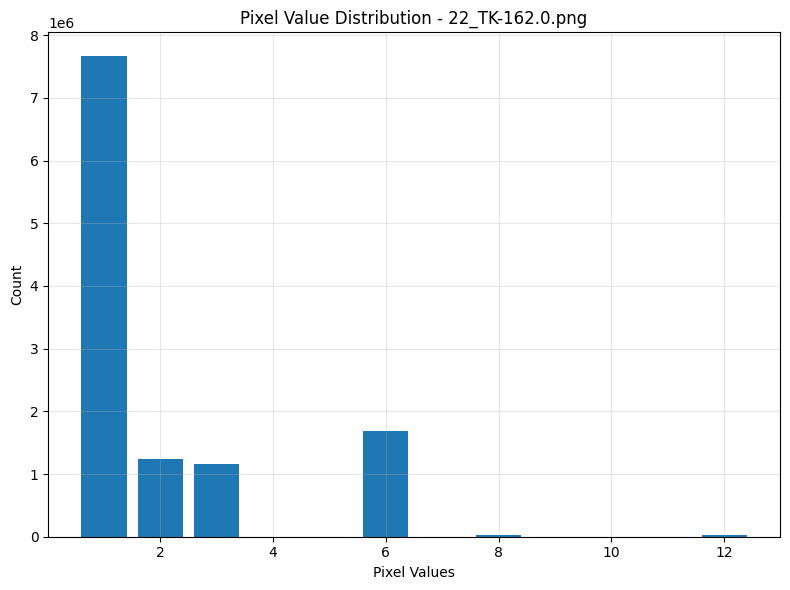

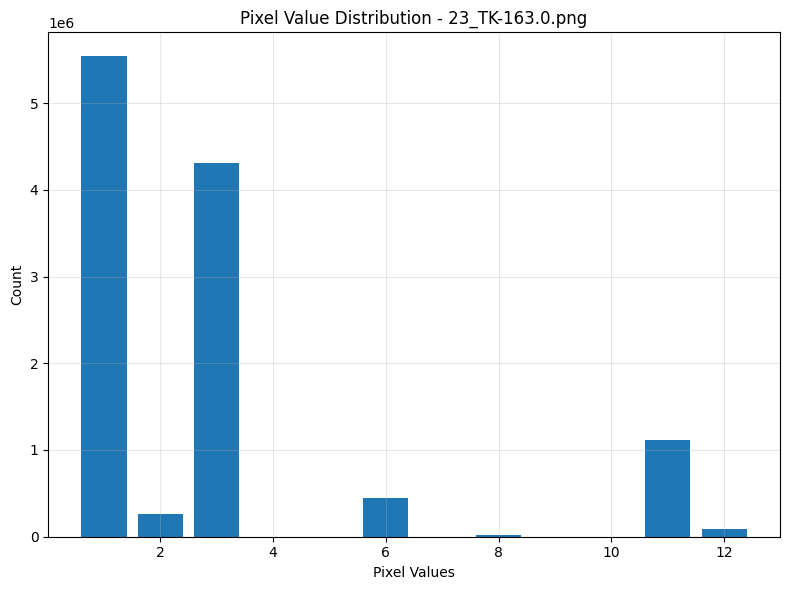

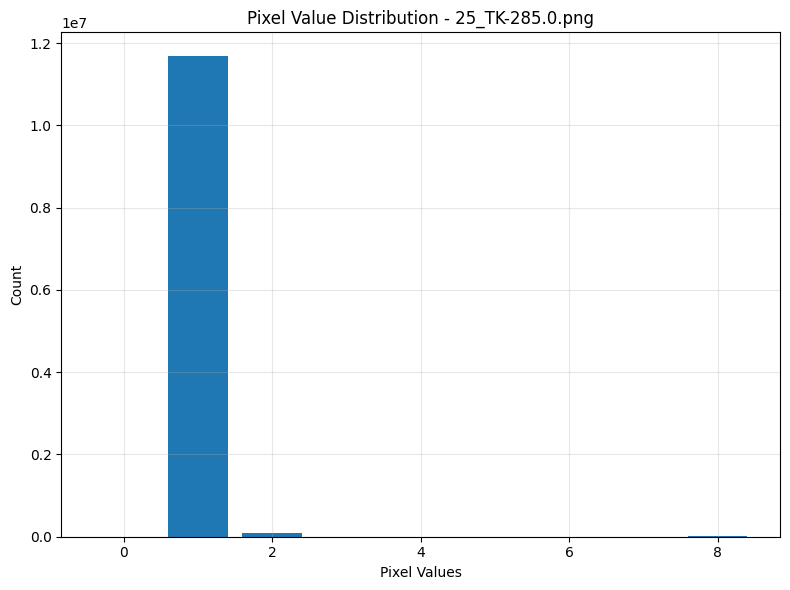

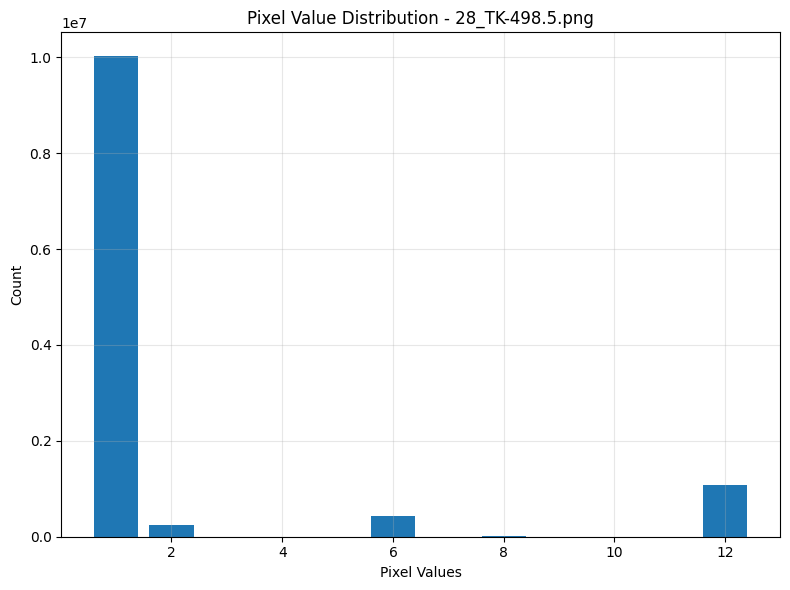

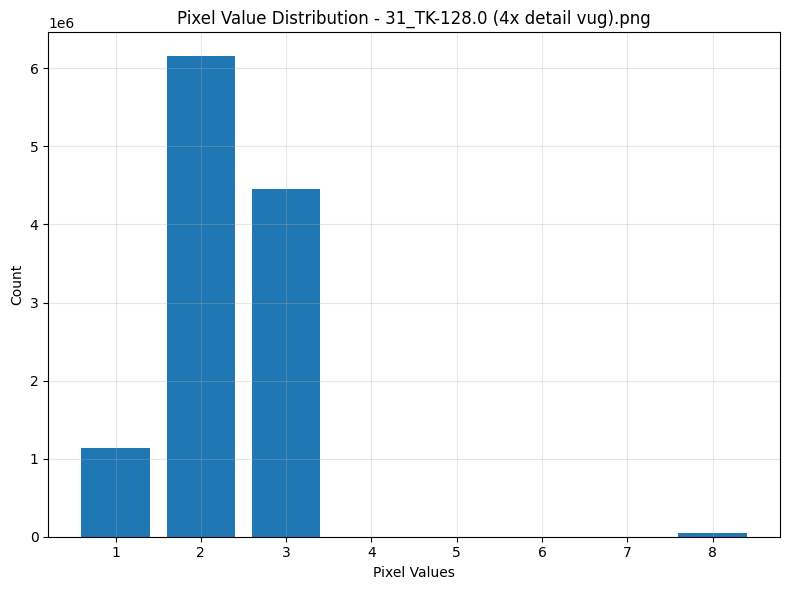

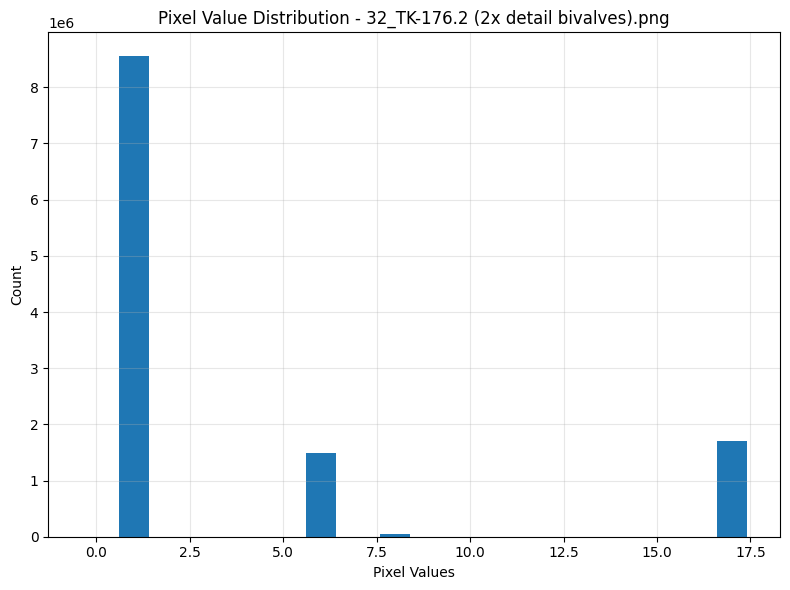

In [ ]:
masks_dataset = taskent.masks_machine_dataset

for idx, mask in enumerate(masks_dataset):
    mask_array = np.array(mask)
    values, counts = np.unique(mask_array[:,:,0], return_counts=True)
    print(f"Unique values and their counts: {list(zip(values, counts))}")

    # Create bar plot
    plt.figure(figsize=(8, 6))
    plt.bar(values, counts)
    plt.xlabel('Pixel Values')
    plt.ylabel('Count')
    plt.title(f'Pixel Value Distribution - {taskent.masks_machine_dataset.image_files[idx]}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()


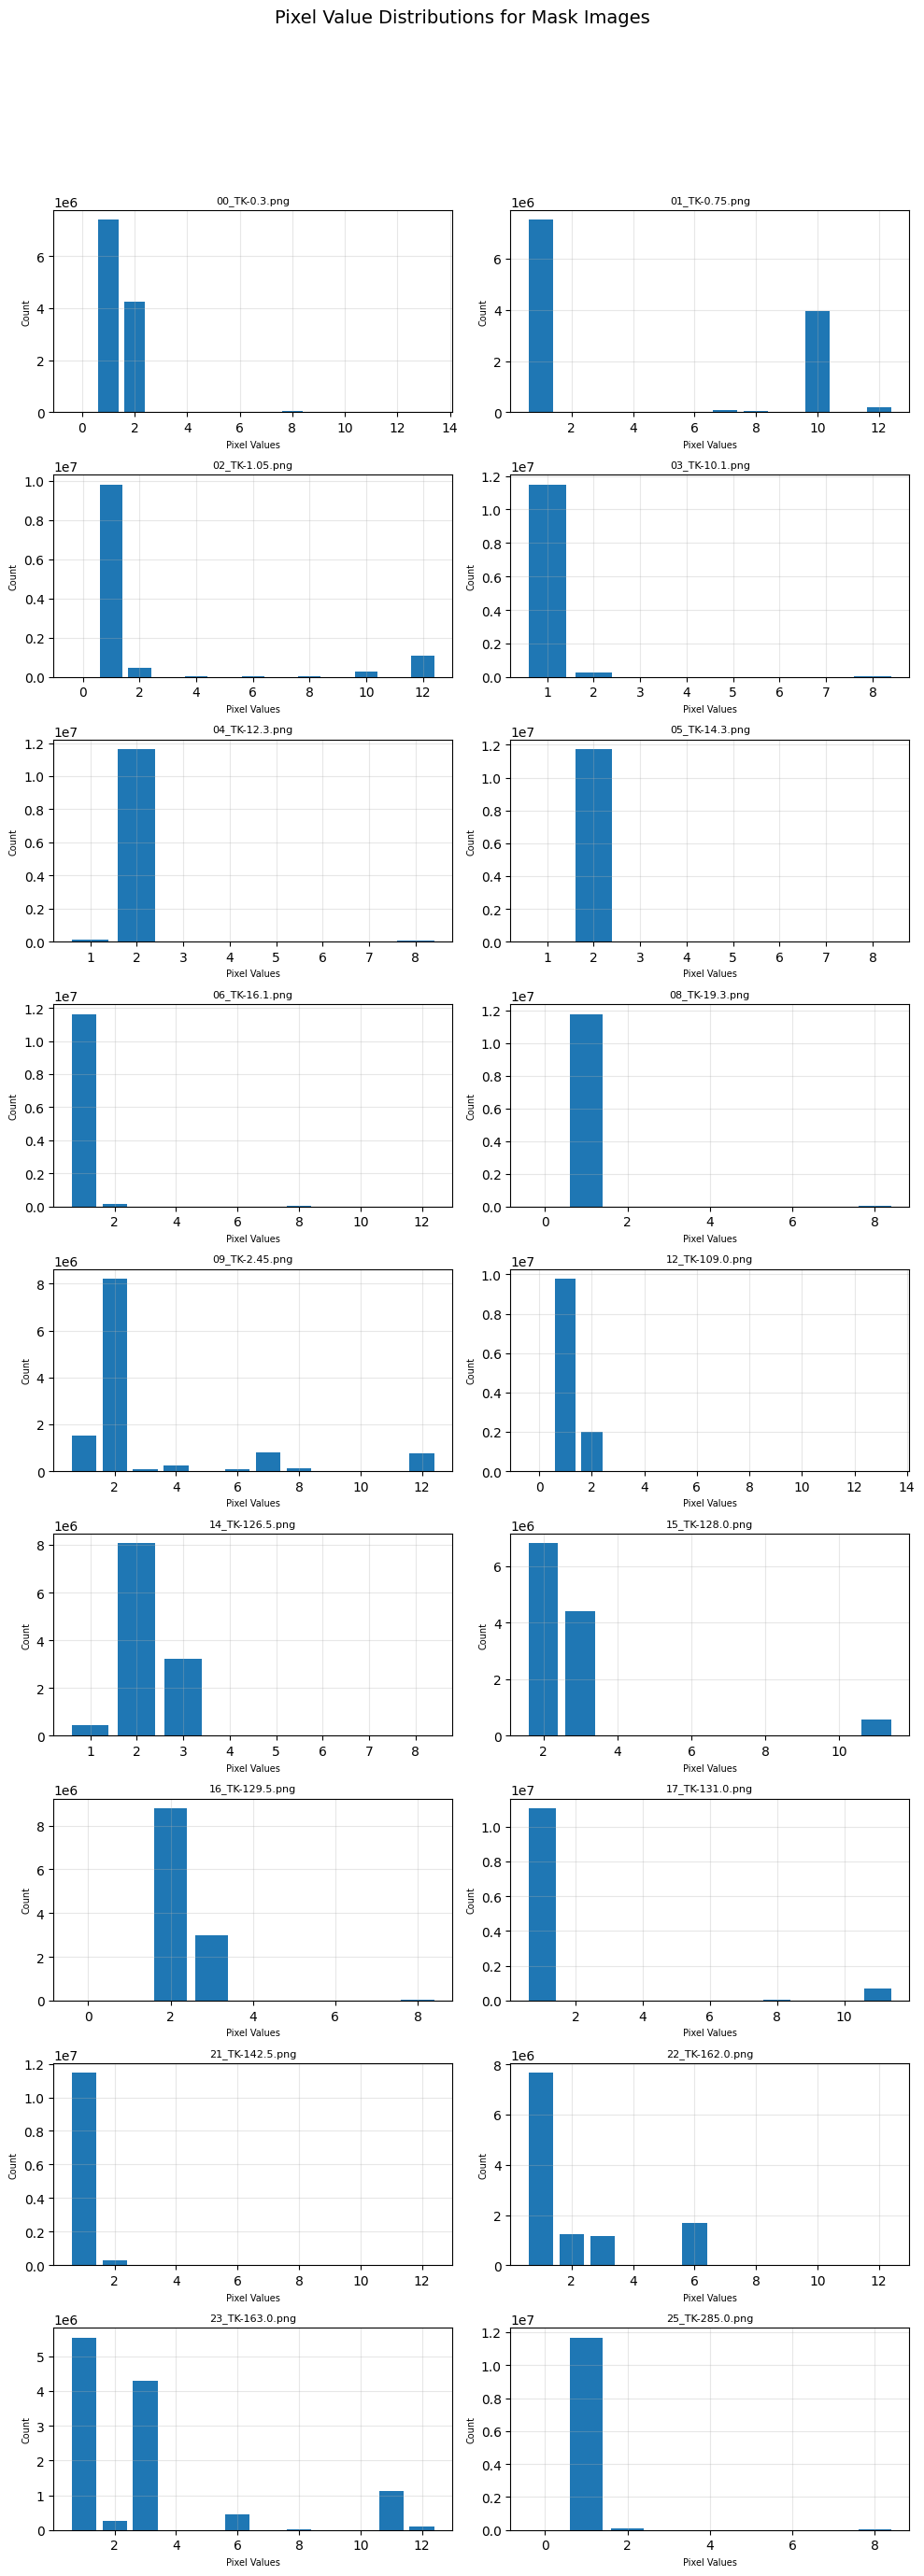

In [8]:
import matplotlib.pyplot as plt
import numpy as np

masks_dataset = taskent.masks_machine_dataset
num_images = len(masks_dataset)
num_cols = 2
num_rows = 9
total_plots = num_rows * num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 3))
axes = axes.flatten()

for idx in range(total_plots):
    ax = axes[idx]

    if idx < num_images:
        mask = masks_dataset[idx]
        mask_array = np.array(mask)
        values, counts = np.unique(mask_array[:, :, 0], return_counts=True)
        ax.bar(values, counts)
        ax.set_title(f'{taskent.masks_machine_dataset.image_files[idx].split("/")[-1]}', fontsize=8)
        ax.set_xlabel('Pixel Values', fontsize=7)
        ax.set_ylabel('Count', fontsize=7)
        ax.grid(True, alpha=0.3)
    else:
        ax.axis('off')  # Hide unused subplots

plt.tight_layout()
plt.suptitle('Pixel Value Distributions for Mask Images', fontsize=14, y=1.02)
plt.subplots_adjust(top=0.94)
plt.savefig("mask_pixel_distributions_2x9.png", dpi=300)
plt.show()

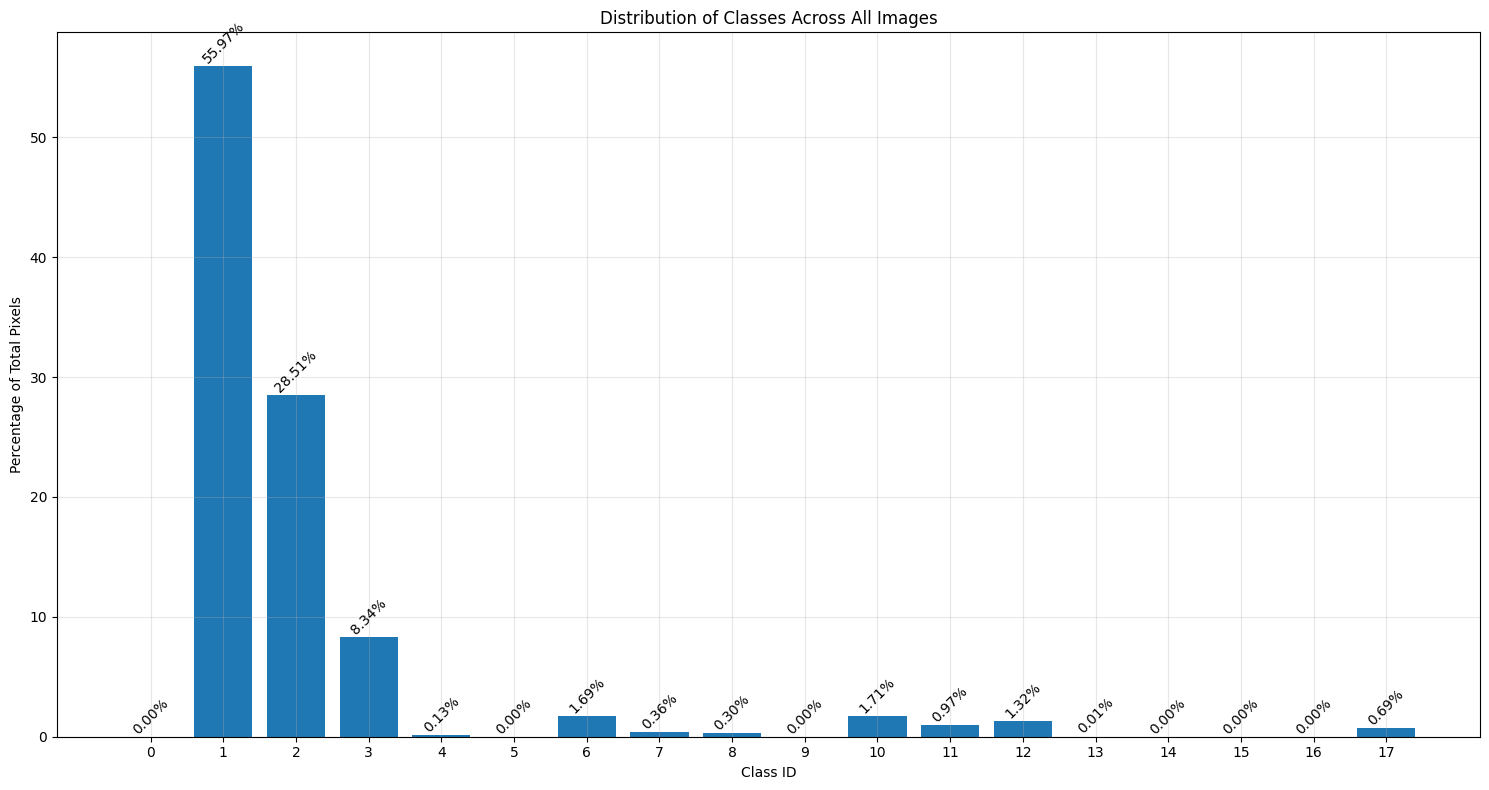

In [ ]:
# Aggregate counts across all images
total_counts = np.zeros(18)  # 18 classes from 0-17

for mask in taskent.masks_machine_dataset:
    mask_array = np.array(mask)
    values, counts = np.unique(mask_array[:,:,0], return_counts=True)
    for val, count in zip(values, counts):
        if val < 18:  # Only count valid classes 0-17
            total_counts[val] = total_counts[val] + count

# Calculate percentages
total_pixels = np.sum(total_counts)
percentages = (total_counts / total_pixels) * 100

# Create bar plot of total distribution
plt.figure(figsize=(15, 8))
plt.bar(range(18), percentages)
plt.xlabel('Class ID')
plt.ylabel('Percentage of Total Pixels')
plt.title('Distribution of Classes Across All Images')
plt.xticks(range(18))
plt.grid(True, alpha=0.3)

# Add percentage labels on top of each bar
for i, pct in enumerate(percentages):
    plt.text(i, pct, f'{pct:.2f}%',
             ha='center', va='bottom', rotation=45)

plt.tight_layout()


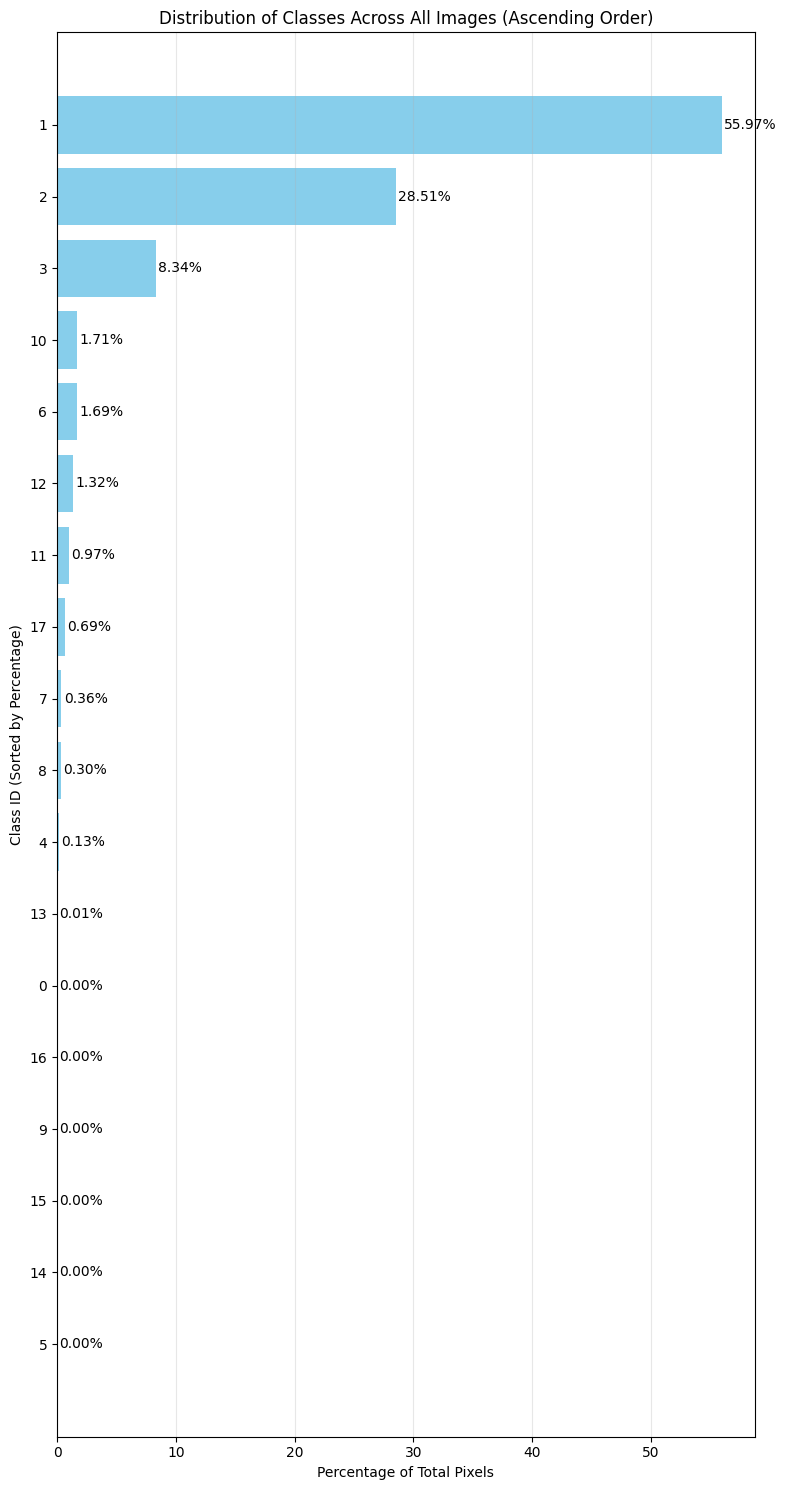

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Aggregate counts across all images
total_counts = np.zeros(18)  # 18 classes from 0-17

for mask in taskent.masks_machine_dataset:
    mask_array = np.array(mask)
    values, counts = np.unique(mask_array[:, :, 0], return_counts=True)
    for val, count in zip(values, counts):
        if val < 18:  # Only count valid classes 0-17
            total_counts[val] += count

# Calculate percentages
total_pixels = np.sum(total_counts)
percentages = (total_counts / total_pixels) * 100

# Sort percentages and corresponding class IDs in ascending order
class_ids = np.arange(18)
sorted_indices = np.argsort(percentages)
sorted_percentages = percentages[sorted_indices]
sorted_class_ids = class_ids[sorted_indices]

# Create horizontal bar plot
plt.figure(figsize=(8, 15))  # Portrait orientation
plt.barh(range(18), sorted_percentages, color='skyblue')
plt.yticks(range(18), sorted_class_ids)
plt.xlabel('Percentage of Total Pixels')
plt.ylabel('Class ID (Sorted by Percentage)')
plt.title('Distribution of Classes Across All Images (Ascending Order)')
plt.grid(True, axis='x', alpha=0.3)

# Add percentage labels to the right of each bar
for i, pct in enumerate(sorted_percentages):
    plt.text(pct + 0.2, i, f'{pct:.2f}%', va='center')

plt.tight_layout()
plt.show()